In [1]:
#! pip install folium bokeh
#!pip install autogluon
!pip install holidays
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import wraps
import time
import os
import seaborn as sns
from utils import *
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from datetime import datetime
from datetime import date
import holidays
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from sklearn.model_selection import train_test_split
from sklearn. multioutput import MultiOutputRegressor

In [2]:
def load_data(names):
    dataframes = []
    for path in [f'{x}.parquet' for x in names]:
        if not os.path.exists(path):  # Check if the file exists
            return False
        try:
            df = pd.read_parquet(path)  # Attempt to load the DataFrame
            dataframes.append(df)
        except Exception as e:  # Catch any error (e.g., file corrupted or read error)
            print(f"Error loading {path}: {e}")
            return False
    return tuple(dataframes)

def save_data(dataframes, names):
    for dataframe, name in zip(dataframes, names):
        dataframe.to_parquet(f'{name}.parquet')

In [3]:
dataframe_names = ['X_train', 'Y_train', 'R_train']
data = load_data(dataframe_names)
X, Y, R = data[0], data[1], data[2]
YR = Y.to_numpy()-R.to_numpy()

In [4]:
#list(X.columns)
pred_columns = [x for x in Y.columns if 'h_' in x]
#pred_columns

In [5]:
lag_columns = [x for x in X.columns if 'lag' in x]

(0.0, 20.0)

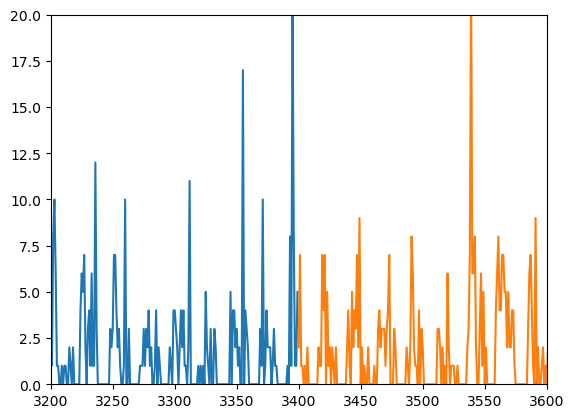

In [6]:
time_series_example = np.array(X[lag_columns].iloc[0])
future_example = np.array(Y[pred_columns].iloc[0])
plt.plot(range(0, len(time_series_example)), time_series_example)
plt.plot(range(len(time_series_example), len(time_series_example)+len(future_example)), future_example)
plt.xlim([3200, 3600])
plt.ylim([0, 20])


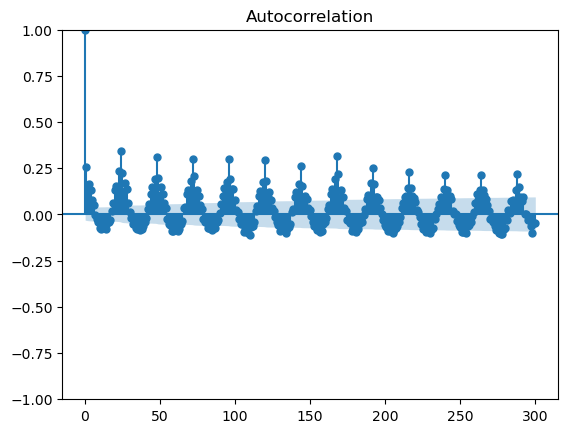

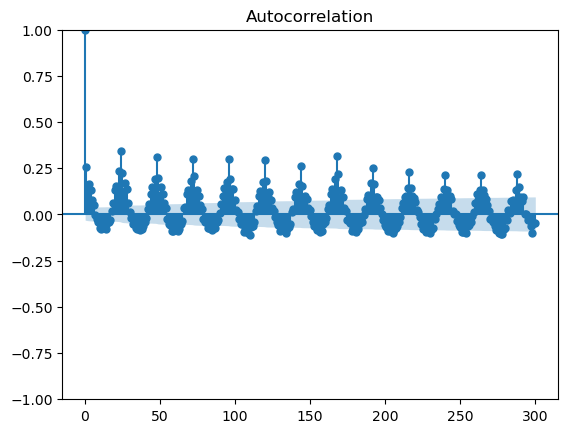

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(time_series_example), lags=300)

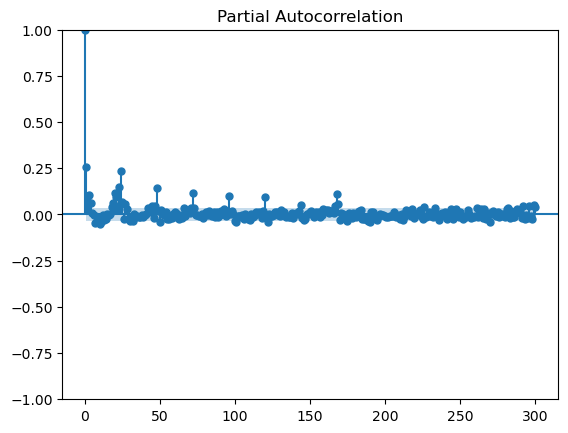

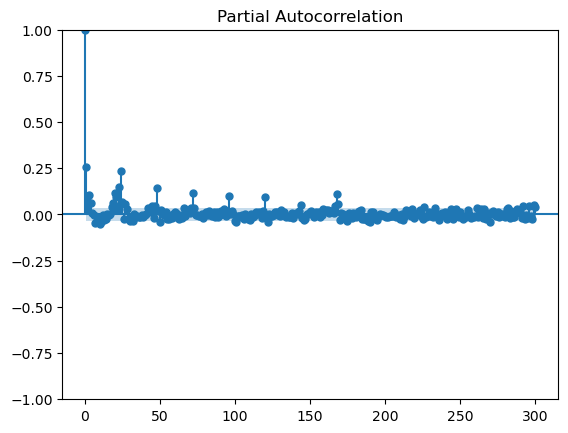

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(np.array(time_series_example), lags=300)

In [8]:
sf=Sdf

NameError: name 'Sdf' is not defined

In [ ]:
#X.columns

In [ ]:
#YR.shape

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, YR, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor model
cb = MultiOutputRegressor(CatBoostRegressor(loss_function='MAE', 
                       verbose=False, 
                       random_seed=42), n_jobs=5)

# Fit the model
cb.fit(X_train, Y_train)

# Predict on the test set
Y_pred = cb.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor

#rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=True, max_samples=0.2, criterion='absolute_error')
#rf.fit(X_train, Y_train)
#Y_pred = rf.predict(X_test)
#mae = mean_absolute_error(Y_test, Y_pred)

#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y.to_numpy()-R.to_numpy(), test_size=0.2, random_state=42)
#rf = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
#rf.fit(X_train, Y_train)
#Y_pred = rf.predict(X_test)
#mae = mean_absolute_error(Y_test, Y_pred)
#
#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
#from autogluon.tabular.experimental._tabular_regressor import TabularRegressor
#from sklearn. multioutput import MultiOutputRegressor
#
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y.to_numpy()-R.to_numpy(), test_size=0.2, random_state=42)
#auto = MultiOutputRegressor(TabularRegressor(eval_metric='mae', time_limit=120, verbosity=0), n_jobs=5)
#auto.fit(X_train, Y_train)
#Y_pred = auto.predict(X_test)
#mae = mean_absolute_error(Y_test, Y_pred)
#
#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error

dummy_mean = DummyRegressor(strategy="median")
dummy_mean.fit(X_train, Y_train)
Y_pred = dummy_mean.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
#X_test.columns

In [ ]:
#from autogluon.tabular.experimental._tabular_regressor import TabularRegressor
#from sklearn. multioutput import MultiOutputRegressor

#auto = TabularRegressor(eval_metric='mae', time_limit=500, verbosity=2, presets='high_quality')
#auto.fit(X_train.to_numpy(), Y_train)
#Y_pred = auto.predict(X_test.to_numpy())
#mae = mean_absolute_error(Y_test, Y_pred)

#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
dataframe_names = ['X_test', 'Y_test', 'R_test']
data = load_data(dataframe_names)
X, Y, R = data[0], data[1], data[2]
YR = Y.to_numpy()-R.to_numpy()
YR = YR[:, ::200]

In [ ]:
pred = cb.predict(X)
mae = mean_absolute_error(pred, YR)
print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")
v1 = np.abs(pred-YR).mean(axis=0)

In [ ]:
pred = dummy_mean.predict(X)
mae = mean_absolute_error(pred, YR)
print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")
v2 = np.abs(pred-YR).mean(axis=0)

In [ ]:
plt.plot(v1)
plt.plot(v2)

In [ ]:
#mae = mean_absolute_error(auto.predict(X), YR)
#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
#dataframe_names = ['X_test', 'Y_test', 'R_test']
#data = load_data(dataframe_names)
#if data == False:
#    start = pd.to_datetime('2022-01-01')
#    end = pd.to_datetime('2022-12-31')
#    
#    random_dates = pd.to_datetime(np.random.uniform(start.value, end.value, 5000), unit='ns')
#    
#    pool = Pool(20)
#    results = list(tqdm(pool.imap(process_date, random_dates), total=len(random_dates)))
#    pool.close()
#    pool.join()
#    
#    X, Y, R = [], [], []
#    
#    # Unpack results
#    for x, y, r in results:
#        X.append(x)
#        Y.append(y)
#        R.append(r)
#    
#    X = pd.concat(X)
#    Y = pd.concat(Y)
#    R = pd.concat(R)
#    
#    save_data([X, Y, R], dataframe_names)
#else:
#    X, Y, R = data[0], data[1], data[2]
#
#print(X.shape, Y.shape, R.shape)

In [ ]:
#Y_pred = rf.predict(X)
#mae = mean_absolute_error(Y, Y_pred+R.to_numpy())
#print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
#wfsf=Sdfsf

In [ ]:
errors = {}

for index, row in tqdm(list((Y-(Y_pred+R.to_numpy())).iterrows())):
    ts = index.ceil(f'{forecaster.round_hours}h')
    for lag in range(0, Y.shape[1]):
        lag_timestamp = ts + lag * pd.Timedelta(hours=3)
        if lag_timestamp not in errors:
            errors[lag_timestamp] = []
        errors[lag_timestamp].append(row.iloc[lag])

In [ ]:
v = sorted([(k, np.mean(v)) for k, v in errors.items()])
dates = [x[0] for x in v]
values = [x[1] for x in v]

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Assuming 'dates' and 'values' are already defined as in your example
# Convert to DataFrame for easier manipulation
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True)

# Compute the moving average with a window size, e.g., 3 for a 3-point moving average
window_size = 21
df['MovingAverage'] = df['Value'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot original values
plt.plot(df.index, df['Value'], label='Original Values', color='b')

# Plot moving average
plt.plot(df.index, df['MovingAverage'], label='Moving Average', color='r')

plt.title('Error of the model over time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Value')  # Y-axis label
plt.xticks(rotation=90)  # Rotate date labels for better readability
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout
plt.grid()  # Show grid
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist((Y-(Y_pred+R.to_numpy())).to_numpy().flatten(), bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
i=11
plt.figure(figsize=(26, 6))
plt.plot(Y.iloc[i].to_list(), label='true', linewidth=3)
plt.plot((Y_pred+R.to_numpy())[i, :], label='pred')
plt.xlabel('horizon (3h buckets)')
plt.ylabel('passengers')
plt.legend()

In [ ]:
plt.plot((Y-(Y_pred+R.to_numpy())).abs().mean(axis=0).to_list())
plt.xlabel('horizon (3h buckets)')
plt.ylabel('MAE')
plt.grid()

In [ ]:
plt.plot((Y-(Y_pred+R.to_numpy())).mean(axis=0).to_list())
plt.xlabel('horizon (3h buckets)')
plt.ylabel('MAE')
plt.grid()

In [ ]:
Y_pred = dummy_mean.predict(X)
mae = mean_absolute_error(Y, Y_pred+R.to_numpy())
print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
i=12
plt.figure(figsize=(26, 6))
plt.plot(Y.iloc[i].to_list(), label='true', linewidth=3)
plt.plot((Y_pred+R.to_numpy())[i, :], label='pred')
plt.xlabel('horizon (3h buckets)')
plt.ylabel('passengers')
plt.legend()

In [ ]:
plt.plot((Y-(Y_pred+R.to_numpy())).abs().mean(axis=0).to_list())
plt.xlabel('horizon (3h buckets)')
plt.ylabel('MAE')
plt.grid()

In [ ]:
Y_pred = R.to_numpy()
mae = mean_absolute_error(Y, R.to_numpy())
print(f"The Mean Absolute Error (MAE) on the test set is: {mae}")

In [ ]:
i=12
plt.figure(figsize=(26, 6))
plt.plot(Y.iloc[i].to_list(), label='true', linewidth=3)
plt.plot((R.to_numpy())[i, :], label='pred')
plt.xlabel('horizon (3h buckets)')
plt.ylabel('passengers')
plt.legend()

In [ ]:
plt.plot((Y-R.to_numpy()).abs().mean(axis=0).to_list())
plt.xlabel('horizon (3h buckets)')
plt.ylabel('MAE')
plt.grid()

In [ ]:
forest_importances = pd.Series(rf.feature_importances_, index=list(X.columns)).sort_values().tail(80)
fig, ax = plt.subplots(figsize=(5, 10))  # Increased figure height
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()